In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


In [3]:
# Select input and response variables
#X = np.sqrt(df["reg_val_mse"].to_numpy())
#Y = np.sqrt(df["hlg_val_mse"].to_numpy())
X = df["reg_val_mae"].to_numpy()
Y = df["hlg_val_mae"].to_numpy()

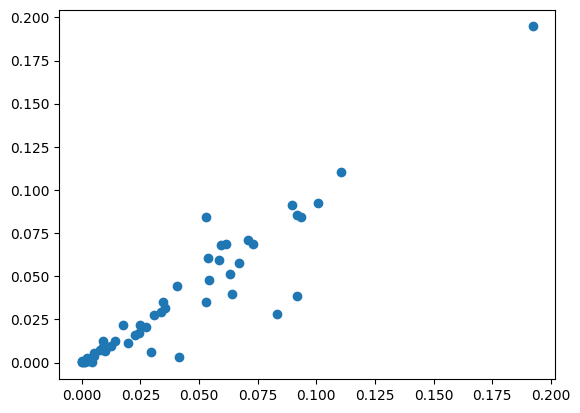

In [4]:
# Plot data
plt.scatter(X, Y)
plt.show()

In [5]:
# Estimate slope
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
b_hat

0.8993885093641105

In [6]:
# Compute residuals
r = Y - b_hat * X
r

array([ 1.47581584e-02,  2.33499868e-04,  4.52165958e-03,  7.51652202e-06,
       -2.26714247e-04, -5.72901686e-03, -7.92478591e-04,  8.38757518e-04,
       -8.88317233e-04,  2.24126856e-04,  1.32411978e-02,  1.77072652e-03,
        3.67804950e-02,  3.86878581e-04, -1.32236382e-03,  5.80956309e-03,
       -4.49490482e-03,  2.07982462e-04, -3.80842579e-04,  8.70481424e-05,
       -2.62925324e-03,  2.18588343e-02,  1.08734161e-02, -1.77545921e-02,
       -6.49592406e-03,  7.87221092e-03,  4.14756730e-04, -8.79060649e-04,
        3.03935801e-03, -4.39894167e-02, -4.45572926e-04, -2.06300353e-02,
        2.58434016e-05, -1.32624782e-03, -2.16535936e-04, -3.84023959e-03,
       -5.00936635e-04,  1.08893378e-02, -1.34189353e-03,  2.98615747e-03,
        7.08112955e-03, -3.42404481e-02,  1.01056608e-03, -4.91727055e-03,
        1.21996889e-02,  3.68457410e-03, -4.65503141e-02,  7.45261834e-03,
       -9.13804152e-04,  9.55369933e-04, -3.74412435e-03, -1.27032305e-02,
       -2.41448579e-03])

In [7]:
# Compute SSres
ss_res = np.sum(r ** 2)
ss_res

0.009215762965432243

In [8]:
# Compute standard error
n = len(X)
p = 0
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
se_b, n

(0.033498552459068416, 53)

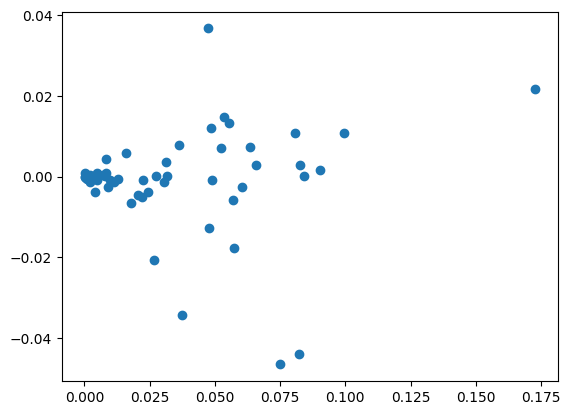

In [9]:
# Plot residuals
plt.scatter(b_hat * X, r)
plt.show()

In [10]:
# Compute confidence interval
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
low = b_hat - t_star * se_b
high = b_hat + t_star * se_b

low, high

(0.8321687461635692, 0.9666082725646519)

In [11]:
# Compute one-sided p-value
t_stat = (b_hat - 1) / se_b
p_val = stats.t.cdf(-abs(t_stat), n - p - 1)
p_val

0.002048936181666598